<a href="https://colab.research.google.com/github/pratheeshsailor/Asrto_Guruji/blob/main/Astro_Guruji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
glance_views_df = pd.read_csv("Downloads/Astro_Guruji/Glance_Views.csv")
sales_data_df = pd.read_csv("Downloads/Astro_Guruji/Sales_Data.csv")

In [ ]:
glance_views_df

,Unnamed: 0,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,0,B1212:PZ:V,2019-05-01,455.0,16.0
1,1,B1212:PZ:V,2019-05-02,478.0,12.0
2,2,B1212:PZ:V,2019-05-03,681.0,42.0
3,3,B1212:PZ:V,2019-05-04,662.0,70.0
4,4,B1212:PZ:V,2019-05-05,568.0,33.0
...,...,...,...,...,...
27332,27332,B185MM49YD,2019-07-14,896.0,6.0
27333,27333,B185MM49YD,2019-07-15,3740.0,59.0
27334,27334,B185MM49YD,2019-07-16,2495.0,50.0
27335,27335,B185MM49YD,2019-07-17,1159.0,19.0


In [ ]:
# Function to perform basic EDA
def eda_summary(df, dataset_name):
    print(f"Dataset: {dataset_name}")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nColumns and Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nUnique Values per Column:")
    print(df.nunique())
    print("\nSample Data:")
    print(df.head())
    print("-" * 50)
    print("\n")

# Perform EDA for each dataset
eda_summary(glance_views_df, "Glance Views")
eda_summary(sales_data_df, "Sales Data")

Dataset: Glance Views
--------------------------------------------------
Shape: (27337, 5)

Columns and Data Types:
Unnamed: 0      int64
SKU_NAME       object
FEED_DATE      object
VIEWS         float64
UNITS         float64
dtype: object

Missing Values:
Unnamed: 0    0
SKU_NAME      0
FEED_DATE     1
VIEWS         1
UNITS         1
dtype: int64

Summary Statistics:
          Unnamed: 0    SKU_NAME   FEED_DATE          VIEWS         UNITS
count   27337.000000       27337       27336   27336.000000  27336.000000
unique           NaN         237         123            NaN           NaN
top              NaN  B1212:PZ:V  2019-05-01            NaN           NaN
freq             NaN         123         237            NaN           NaN
mean    13668.000000         NaN         NaN     883.498683     61.336004
std      7891.656491         NaN         NaN    2396.390032    238.800821
min         0.000000         NaN         NaN       1.000000   -934.000000
25%      6834.000000         NaN     

In [ ]:
# Convert date to a consistent datetime format
glance_views_df['FEED_DATE'] = pd.to_datetime(glance_views_df['FEED_DATE'], errors='coerce')
sales_data_df['FEED_DATE'] = pd.to_datetime(sales_data_df['FEED_DATE'],errors='coerce')

# removing symbols in SKM_NAME
glance_views_df['SKU_NAME'] = glance_views_df['SKU_NAME'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
sales_data_df['SKU_NAME'] = sales_data_df['SKU_NAME'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

# droping unwanted columns
glance_views_df.drop('Unnamed: 0', axis=1, inplace=True)
sales_data_df.drop('Unnamed: 0', axis=1, inplace=True)

# fill null values
sales_data_df['REP_OOS'] = sales_data_df['REP_OOS'].fillna(0)

In [ ]:
import numpy as np

# Calculate the price per unit, handling cases where ORDERED_UNITS is 0
sales_data_df['PRICE_PER_UNIT'] = np.where(
    sales_data_df['ORDERED_UNITS'] == 0,
    0,  # Assign 0 if ORDERED_UNITS is 0
    sales_data_df['ORDERED_REVENUE'] / sales_data_df['ORDERED_UNITS']
)

# Group by SKU_NAME and compute the average price per unit
average_price_per_unit = (
    sales_data_df.groupby('SKU_NAME', as_index=False)['PRICE_PER_UNIT']
    .mean()
    .sort_values(by='PRICE_PER_UNIT', ascending=False)
)




In [ ]:
average_price_per_unit.head(5)

,SKU_NAME,PRICE_PER_UNIT
182,C03CBL721,973.929330
200,C093JQ9EG,686.472434
37,B082S99NC,651.584532
134,B22D5SOO2,633.468989
166,C01TSH17OH,338.286521


High-value SKUs like C03CBL721 may represent premium or niche products that likely target a smaller but high-spending customer segment.

In [ ]:


# Total unique SKUs
total_skus = sales_data_df['SKU_NAME'].nunique()

# SKUs with revenue
skus_with_revenue = sales_data_df[sales_data_df['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()
percentage_with_revenue = (skus_with_revenue / total_skus) * 100

print(f"Percentage of SKUs with revenue: {percentage_with_revenue:.2f}%")

# SKUs that stopped selling after July
# Filter for sales before and after July
pre_july_skus = sales_data_df[sales_data_df['FEED_DATE'] <= '2023-07-31']['SKU_NAME'].unique()
post_july_sales = sales_data_df[(sales_data_df['FEED_DATE'] > '2023-07-31') & (sales_data_df['ORDERED_UNITS'] > 0)]
post_july_skus = post_july_sales['SKU_NAME'].unique()

# Identify SKUs with sales before July but not after
skus_stopped_selling = set(pre_july_skus) - set(post_july_skus)

print(f"Number of SKUs that stopped selling after July: {len(skus_stopped_selling)}")
print(f"Top First 5 SKUs that stopped selling after July: {list(skus_stopped_selling)[:5]}")


Percentage of SKUs with revenue: 78.71%
Number of SKUs that stopped selling after July: 465
Top First 5 SKUs that stopped selling after July: ['D28EGTXVWH', 'C2775R2HTS', 'C0038K4UWZ', 'D13I94VQZ2', 'C213I5Z84I']


* 78.71% of SKUs generated revenue during the time period.
* 465 SKUs stopped selling completely after July, with examples like B0009IWHS and D03O20QQDE.
*  A significant proportion of SKUs ceased generating sales after July, which may be due to inventory issues, seasonality, or reduced demand.
These SKUs should be analyzed further to identify trends and improve sales strategies.

In [ ]:
# Aggregate sales data by date
daily_sales = sales_data_df.groupby('FEED_DATE')['ORDERED_REVENUE'].sum().reset_index()

# Calculate mean and standard deviation of daily sales
mean_sales = daily_sales['ORDERED_REVENUE'].mean()
std_sales = daily_sales['ORDERED_REVENUE'].std()

# Define threshold for a sale event (e.g., mean + 2*std)
threshold = mean_sales + 2 * std_sales

# Identify dates with unusually high sales
sale_event_dates = daily_sales[daily_sales['ORDERED_REVENUE'] > threshold]

print("Potential Sale Event Dates:")
print(sale_event_dates)


Potential Sale Event Dates:
    FEED_DATE  ORDERED_REVENUE
75 2019-07-15       5158848.46
76 2019-07-16       3105376.74


* Potential Sale Dates: July 15, 2019, and July 16, 2019, show spikes in ORDERED_REVENUE:
        July 15: $5,158,848.46
        July 16: $3,105,376.74
*  These dates align with typical mid-year sale events like Prime Day, suggesting significant promotions or discounts drove high customer engagement and sales.

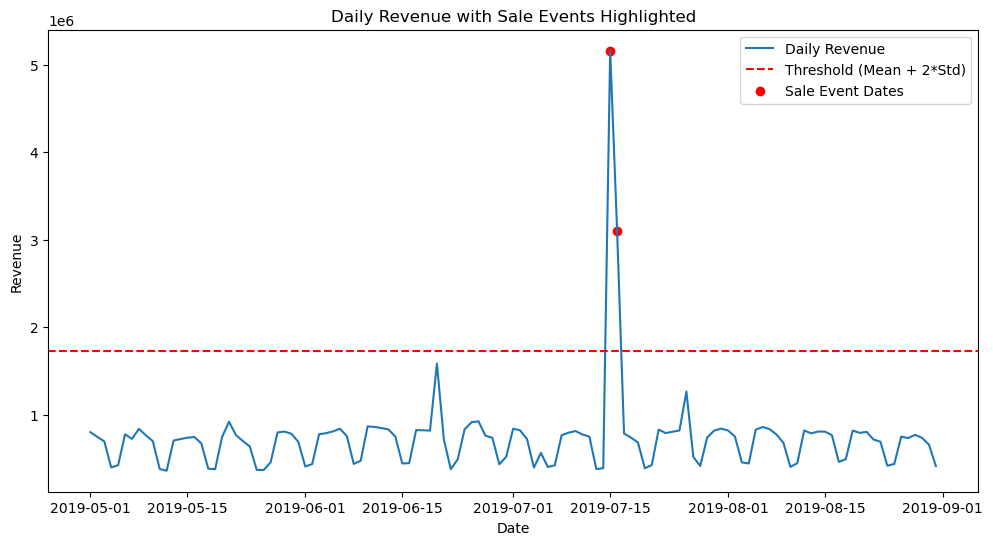

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['FEED_DATE'], daily_sales['ORDERED_REVENUE'], label="Daily Revenue")
plt.axhline(threshold, color='r', linestyle='--', label="Threshold (Mean + 2*Std)")
plt.scatter(
    sale_event_dates['FEED_DATE'],
    sale_event_dates['ORDERED_REVENUE'],
    color='red',
    label='Sale Event Dates'
)
plt.title("Daily Revenue with Sale Events Highlighted")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_rel

# Assume 'sale_event_dates' has been calculated
sale_event_dates_list = sale_event_dates['FEED_DATE'].tolist()

# Prepare data for analysis
cannibalization_results = []

for sale_date in sale_event_dates_list:
    # Define pre-sale and post-sale windows (7 days each)
    pre_sale_window = sales_data_df[
        (sales_data_df['FEED_DATE'] >= sale_date - pd.Timedelta(days=7)) &
        (sales_data_df['FEED_DATE'] < sale_date)
    ]
    post_sale_window = sales_data_df[
        (sales_data_df['FEED_DATE'] > sale_date) &
        (sales_data_df['FEED_DATE'] <= sale_date + pd.Timedelta(days=7))
    ]

    # Aggregate total revenue in each window
    pre_sale_revenue = pre_sale_window['ORDERED_REVENUE'].sum()
    post_sale_revenue = post_sale_window['ORDERED_REVENUE'].sum()

    # Append to results
    cannibalization_results.append({
        'Sale Date': sale_date,
        'Pre-Sale Revenue': pre_sale_revenue,
        'Post-Sale Revenue': post_sale_revenue
    })

# Convert to DataFrame
cannibalization_df = pd.DataFrame(cannibalization_results)

# Calculate statistical significance
pre_sale_values = cannibalization_df['Pre-Sale Revenue']
post_sale_values = cannibalization_df['Post-Sale Revenue']
t_stat, p_value = ttest_rel(pre_sale_values, post_sale_values)

print("Cannibalization Results:")
print(cannibalization_df)

print("\nStatistical Test (T-Test):")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in sales, indicating potential cannibalization.")
else:
    print("No significant difference in sales, indicating no cannibalization.")

Cannibalization Results:
   Sale Date  Pre-Sale Revenue  Post-Sale Revenue
0 2019-07-15        4681365.03         6969856.43
1 2019-07-16        9071634.20         4657043.08

Statistical Test (T-Test):
T-Statistic: 0.32, P-Value: 0.8045
No significant difference in sales, indicating no cannibalization.


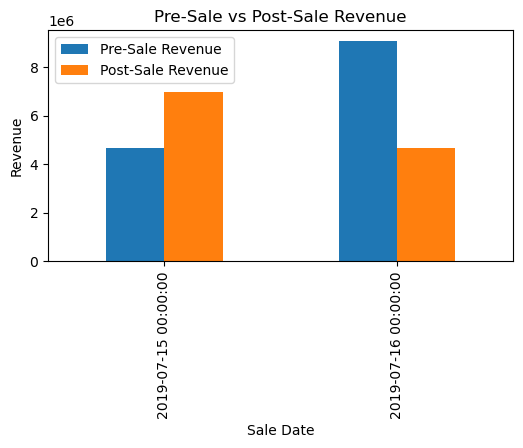

In [ ]:
# Bar plot for pre-sale vs post-sale revenue
cannibalization_df.plot(
    x='Sale Date',
    kind='bar',
    figsize=(6, 3),
    title='Pre-Sale vs Post-Sale Revenue'
)
plt.ylabel("Revenue")
plt.show()


In [ ]:
# Aggregate revenue at the start and end of the time period
sales_data_df['FEED_DATE'] = pd.to_datetime(sales_data_df['FEED_DATE'])

# Get first and last dates
start_date = sales_data_df['FEED_DATE'].min()
end_date = sales_data_df['FEED_DATE'].max()

# Calculate revenue at the start and end of the period for categories and subcategories
category_growth = sales_data_df.groupby(['CATEGORY', 'FEED_DATE'])['ORDERED_REVENUE'].sum().unstack(fill_value=0)
subcategory_growth = sales_data_df.groupby(['CATEGORY', 'SUB_CATEGORY', 'FEED_DATE'])['ORDERED_REVENUE'].sum().unstack(fill_value=0)

# Compute growth rates for categories
category_growth['Growth Rate'] = ((category_growth[end_date] - category_growth[start_date]) / category_growth[start_date]) * 100

# Compute growth rates for subcategories
subcategory_growth['Growth Rate'] = ((subcategory_growth[end_date] - subcategory_growth[start_date]) / subcategory_growth[start_date]) * 100

# Merge category growth rates into subcategories
subcategory_growth = subcategory_growth.merge(
    category_growth[['Growth Rate']],
    left_on='CATEGORY',
    right_index=True,
    suffixes=('_SubCategory', '_Category')
)

# Compute relative growth
subcategory_growth['Relative Growth'] = subcategory_growth['Growth Rate_SubCategory'] / subcategory_growth['Growth Rate_Category']

# Identify the slowest-growing subcategory for each category
slowest_subcategories = subcategory_growth.loc[
    subcategory_growth.groupby('CATEGORY')['Relative Growth'].idxmin()
]

print("Slowest-Growing Subcategories:")
slowest_subcategories[['Growth Rate_SubCategory', 'Growth Rate_Category', 'Relative Growth']]





Slowest-Growing Subcategories:


,FEED_DATE,Growth Rate_SubCategory,Growth Rate_Category,Relative Growth
CATEGORY,SUB_CATEGORY,,,
0100 Wireless Phones,0191 Connected Wearables,-100.000000,-100.000000,1.000000
0400 Computer Peripherals,0435 Webcams - DELETED,-84.023003,84.688222,-0.992145
1000 Inputs,1006 Gamepads and Controllers,40.791252,-53.131416,-0.767743
10800 Xbox One Accessories,10830 Headsets,-68.387496,-68.387496,1.000000
1500 Tablet Accessories,1501 Tablet Carrying Cases & Style,-100.000000,43.747210,-2.285860
1600 Sony PSP Games and Software,1610 Classic Games & RetroArcade,93.512606,93.512606,1.000000
5000 Portable Media Players,5010 Other Portable Audio,1204.088600,-31.092997,-38.725395
5300 Headphones,5310 Headphones,83.929303,83.929303,1.000000
5600 Video Components,5610 A/V Remote Controls,-30.546837,-30.546837,1.000000


In [ ]:
# Identify concerning subcategories
concerning_subcategories = slowest_subcategories[
    (slowest_subcategories['Growth Rate_SubCategory'] < 0) |
    (slowest_subcategories['Relative Growth'] < 0.5)
]

print("\nConcerning Subcategories:")
concerning_subcategories


Concerning Subcategories:


,FEED_DATE,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-05 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,...,2019-08-25 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-08-31 00:00:00,Growth Rate_SubCategory,Growth Rate_Category,Relative Growth
CATEGORY,SUB_CATEGORY,,,,,,,,,,,,,,,,,,,,,
0100 Wireless Phones,0191 Connected Wearables,629.91,349.95,419.94,489.93,279.96,769.89,279.96,979.86,769.89,769.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.000000,-100.000000,1.000000
0400 Computer Peripherals,0435 Webcams - DELETED,479.94,-799.90,319.96,0.00,0.00,719.91,719.91,399.95,1039.87,79.99,...,76.68,1840.32,1226.88,381.09,1610.28,1073.52,76.68,-84.023003,84.688222,-0.992145
1000 Inputs,1006 Gamepads and Controllers,36578.21,28780.49,34215.05,31861.58,28243.96,29560.59,27272.52,29177.88,30763.87,31061.21,...,45887.32,46175.63,43384.50,47768.43,47908.11,67508.24,51498.92,40.791252,-53.131416,-0.767743
10800 Xbox One Accessories,10830 Headsets,8138.52,6164.66,6624.77,7724.64,7318.63,7830.64,7929.62,6892.59,9554.51,7253.75,...,3558.72,2480.75,2675.76,3000.82,2491.69,3292.76,2572.79,-68.387496,-68.387496,1.000000
1500 Tablet Accessories,1501 Tablet Carrying Cases & Style,121.96,0.00,0.00,67.79,98.97,0.00,0.00,196.38,246.99,76.99,...,0.00,0.00,0.00,0.00,37.43,0.00,0.00,-100.000000,43.747210,-2.285860
5000 Portable Media Players,5010 Other Portable Audio,251.92,367.76,91.94,0.00,349.95,69.99,69.99,279.96,209.97,69.99,...,6408.41,5329.07,8006.56,7892.01,5288.54,4494.19,3285.26,1204.088600,-31.092997,-38.725395
5600 Video Components,5610 A/V Remote Controls,23640.32,23450.39,23832.18,11115.83,22612.44,19864.27,21071.53,16810.06,19187.13,21632.52,...,22805.87,27779.10,21731.69,20747.91,20657.84,17618.63,16418.95,-30.546837,-30.546837,1.000000
6200 PC Accessories,6230 Headsets,649.00,1003.00,654.00,681.00,1099.00,1035.00,976.00,981.00,563.00,858.00,...,467.36,467.36,759.46,703.32,1053.84,642.62,584.20,-9.984592,-9.984592,1.000000


In [ ]:
concerning_subcategories

,FEED_DATE,2019-05-01 00:00:00,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-05 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,...,2019-08-25 00:00:00,2019-08-26 00:00:00,2019-08-27 00:00:00,2019-08-28 00:00:00,2019-08-29 00:00:00,2019-08-30 00:00:00,2019-08-31 00:00:00,Growth Rate_SubCategory,Growth Rate_Category,Relative Growth
CATEGORY,SUB_CATEGORY,,,,,,,,,,,,,,,,,,,,,
0100 Wireless Phones,0191 Connected Wearables,629.91,349.95,419.94,489.93,279.96,769.89,279.96,979.86,769.89,769.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.000000,-100.000000,1.000000
0400 Computer Peripherals,0435 Webcams - DELETED,479.94,-799.90,319.96,0.00,0.00,719.91,719.91,399.95,1039.87,79.99,...,76.68,1840.32,1226.88,381.09,1610.28,1073.52,76.68,-84.023003,84.688222,-0.992145
1000 Inputs,1006 Gamepads and Controllers,36578.21,28780.49,34215.05,31861.58,28243.96,29560.59,27272.52,29177.88,30763.87,31061.21,...,45887.32,46175.63,43384.50,47768.43,47908.11,67508.24,51498.92,40.791252,-53.131416,-0.767743
10800 Xbox One Accessories,10830 Headsets,8138.52,6164.66,6624.77,7724.64,7318.63,7830.64,7929.62,6892.59,9554.51,7253.75,...,3558.72,2480.75,2675.76,3000.82,2491.69,3292.76,2572.79,-68.387496,-68.387496,1.000000
1500 Tablet Accessories,1501 Tablet Carrying Cases & Style,121.96,0.00,0.00,67.79,98.97,0.00,0.00,196.38,246.99,76.99,...,0.00,0.00,0.00,0.00,37.43,0.00,0.00,-100.000000,43.747210,-2.285860
5000 Portable Media Players,5010 Other Portable Audio,251.92,367.76,91.94,0.00,349.95,69.99,69.99,279.96,209.97,69.99,...,6408.41,5329.07,8006.56,7892.01,5288.54,4494.19,3285.26,1204.088600,-31.092997,-38.725395
5600 Video Components,5610 A/V Remote Controls,23640.32,23450.39,23832.18,11115.83,22612.44,19864.27,21071.53,16810.06,19187.13,21632.52,...,22805.87,27779.10,21731.69,20747.91,20657.84,17618.63,16418.95,-30.546837,-30.546837,1.000000
6200 PC Accessories,6230 Headsets,649.00,1003.00,654.00,681.00,1099.00,1035.00,976.00,981.00,563.00,858.00,...,467.36,467.36,759.46,703.32,1053.84,642.62,584.20,-9.984592,-9.984592,1.000000


In [ ]:
# Check for null values
null_summary = sales_data_df.isnull().sum()

print("Null Values Summary:")
print(null_summary)

# Check for duplicates
duplicate_rows = sales_data_df[sales_data_df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")

# Check for outliers in numerical columns
numeric_cols = ['ORDERED_REVENUE', 'ORDERED_UNITS']
outliers = sales_data_df[numeric_cols].apply(
    lambda x: x[(x < (x.mean() - 3 * x.std())) | (x > (x.mean() + 3 * x.std()))]
).dropna()

print(f"\nOutliers in numerical columns:\n{outliers}")

# Logical anomalies
# ORDERED_UNITS > 0 but ORDERED_REVENUE = 0
logical_anomalies = sales_data_df[(sales_data_df['ORDERED_UNITS'] > 0) & (sales_data_df['ORDERED_REVENUE'] == 0)]
print(f"\nLogical Anomalies (Units > 0, Revenue = 0):\n{logical_anomalies}")

# Negative values
negative_values = sales_data_df[
    (sales_data_df['ORDERED_REVENUE'] < 0) | (sales_data_df['ORDERED_UNITS'] < 0)
]
print(f"\nNegative Values:\n{negative_values}")

# SubCategory mismatches
subcategory_mismatches = sales_data_df[
    sales_data_df['SUB_CATEGORY'].isnull() | sales_data_df['CATEGORY'].isnull()
]
print(f"\nSubcategory Mismatches:\n{subcategory_mismatches}")


Null Values Summary:
SKU_NAME           0
FEED_DATE          0
CATEGORY           0
SUB_CATEGORY       0
ORDERED_REVENUE    0
ORDERED_UNITS      0
REP_OOS            0
PRICE_PER_UNIT     0
dtype: int64

Number of duplicate rows: 0

Outliers in numerical columns:
       ORDERED_REVENUE  ORDERED_UNITS
334           31657.76         1432.0
365           32323.94         1406.0
371           32517.87         1417.0
377           33703.42         1466.0
1423          46275.33         2318.0
...                ...            ...
33255         34746.18         1777.0
33256         33866.91         1694.0
35895        215657.02         4589.0
36661         61542.16         1297.0
36662         38203.39          831.0

[140 rows x 2 columns]

Logical Anomalies (Units > 0, Revenue = 0):
Empty DataFrame
Columns: [SKU_NAME, FEED_DATE, CATEGORY, SUB_CATEGORY, ORDERED_REVENUE, ORDERED_UNITS, REP_OOS, PRICE_PER_UNIT]
Index: []

Negative Values:
         SKU_NAME  FEED_DATE                   CATEGORY 

In [ ]:
merged_df = pd.merge(sales_data_df, glance_views_df, on='SKU_NAME', how='left')

In [ ]:
merged_df.drop('FEED_DATE_y', axis=1, inplace=True)
merged_df.rename(columns={'FEED_DATE_x': 'FEED_DATE'})

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS,PRICE_PER_UNIT,VIEWS,UNITS
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.00,0.0,0.0,0.00,NaN,NaN
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.00,0.0,0.0,0.00,NaN,NaN
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.00,0.0,0.0,0.00,NaN,NaN
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.00,0.0,0.0,0.00,NaN,NaN
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.00,0.0,0.0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3281268,D29S5IMRDI,2019-08-27,1000 Inputs,1007 Other Input Devices,129.99,1.0,0.0,129.99,NaN,NaN
3281269,D29S5IMRDI,2019-08-28,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,NaN,NaN
3281270,D29S5IMRDI,2019-08-29,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,NaN,NaN
3281271,D29S5IMRDI,2019-08-30,1000 Inputs,1007 Other Input Devices,259.98,2.0,0.0,129.99,NaN,NaN


Correlation between Unit Conversion and ASP: -0.11


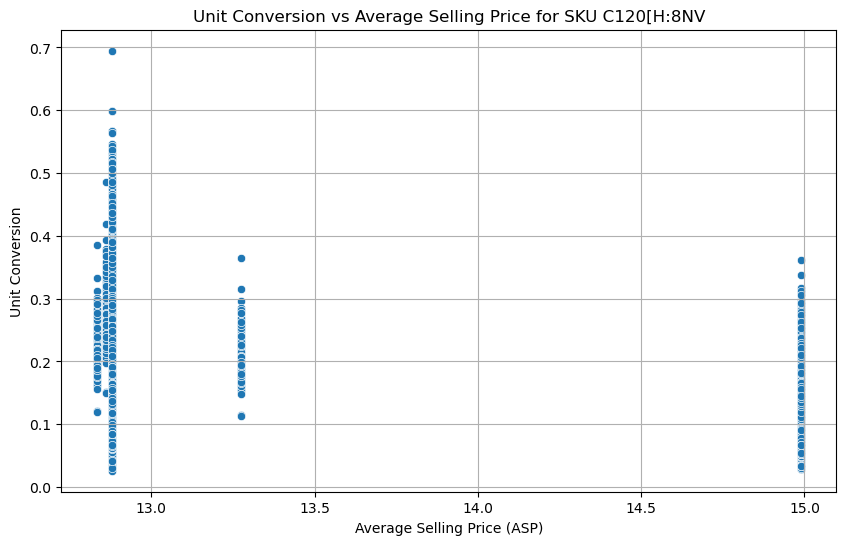

Linear Regression Results:
Coefficient (Slope): -0.0146
Intercept: 0.3608


In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Filter data for SKU C120[H:8NV]
sku_data = merged_df[merged_df['SKU_NAME'] == 'C120H8NV']

# Ensure ORDERED_UNITS > 0 to avoid division errors
sku_data = sku_data[sku_data['ORDERED_UNITS'] > 0]

# Calculate Unit Conversion and ASP
sku_data['Unit Conversion'] = sku_data['ORDERED_UNITS'] / sku_data['VIEWS']
sku_data['ASP'] = sku_data['ORDERED_REVENUE'] / sku_data['ORDERED_UNITS']

# Correlation Analysis
correlation = sku_data[['Unit Conversion', 'ASP']].corr().iloc[0, 1]
print(f"Correlation between Unit Conversion and ASP: {correlation:.2f}")

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sku_data, x='ASP', y='Unit Conversion')
plt.title('Unit Conversion vs Average Selling Price for SKU C120[H:8NV')
plt.xlabel('Average Selling Price (ASP)')
plt.ylabel('Unit Conversion')
plt.grid(True)
plt.show()

# Regression Analysis
X = sku_data[['ASP']].values
y = sku_data['Unit Conversion'].values
model = LinearRegression()
model.fit(X, y)

print("Linear Regression Results:")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Interpretation of Results:
Coefficient (Slope): -0.0146:

The negative slope indicates that as the Average Selling Price (ASP) increases, the Unit Conversion decreases.
For every 1-unit increase in ASP, Unit Conversion decreases by approximately 0.0146 units.
Intercept: 0.3608:

When the ASP is zero (hypothetically), the Unit Conversion would be around 0.3608. While this scenario is not realistic, it serves as a baseline for the regression model.
Implication:

The results suggest an inverse relationship between ASP and Unit Conversion for this SKU. Increasing the price may reduce the likelihood of units being sold per view.

In [ ]:
print(merged_df.columns)

Index(['SKU_NAME', 'FEED_DATE_x', 'CATEGORY', 'SUB_CATEGORY',
       'ORDERED_REVENUE', 'ORDERED_UNITS', 'REP_OOS', 'PRICE_PER_UNIT',
       'VIEWS', 'UNITS'],
      dtype='object')


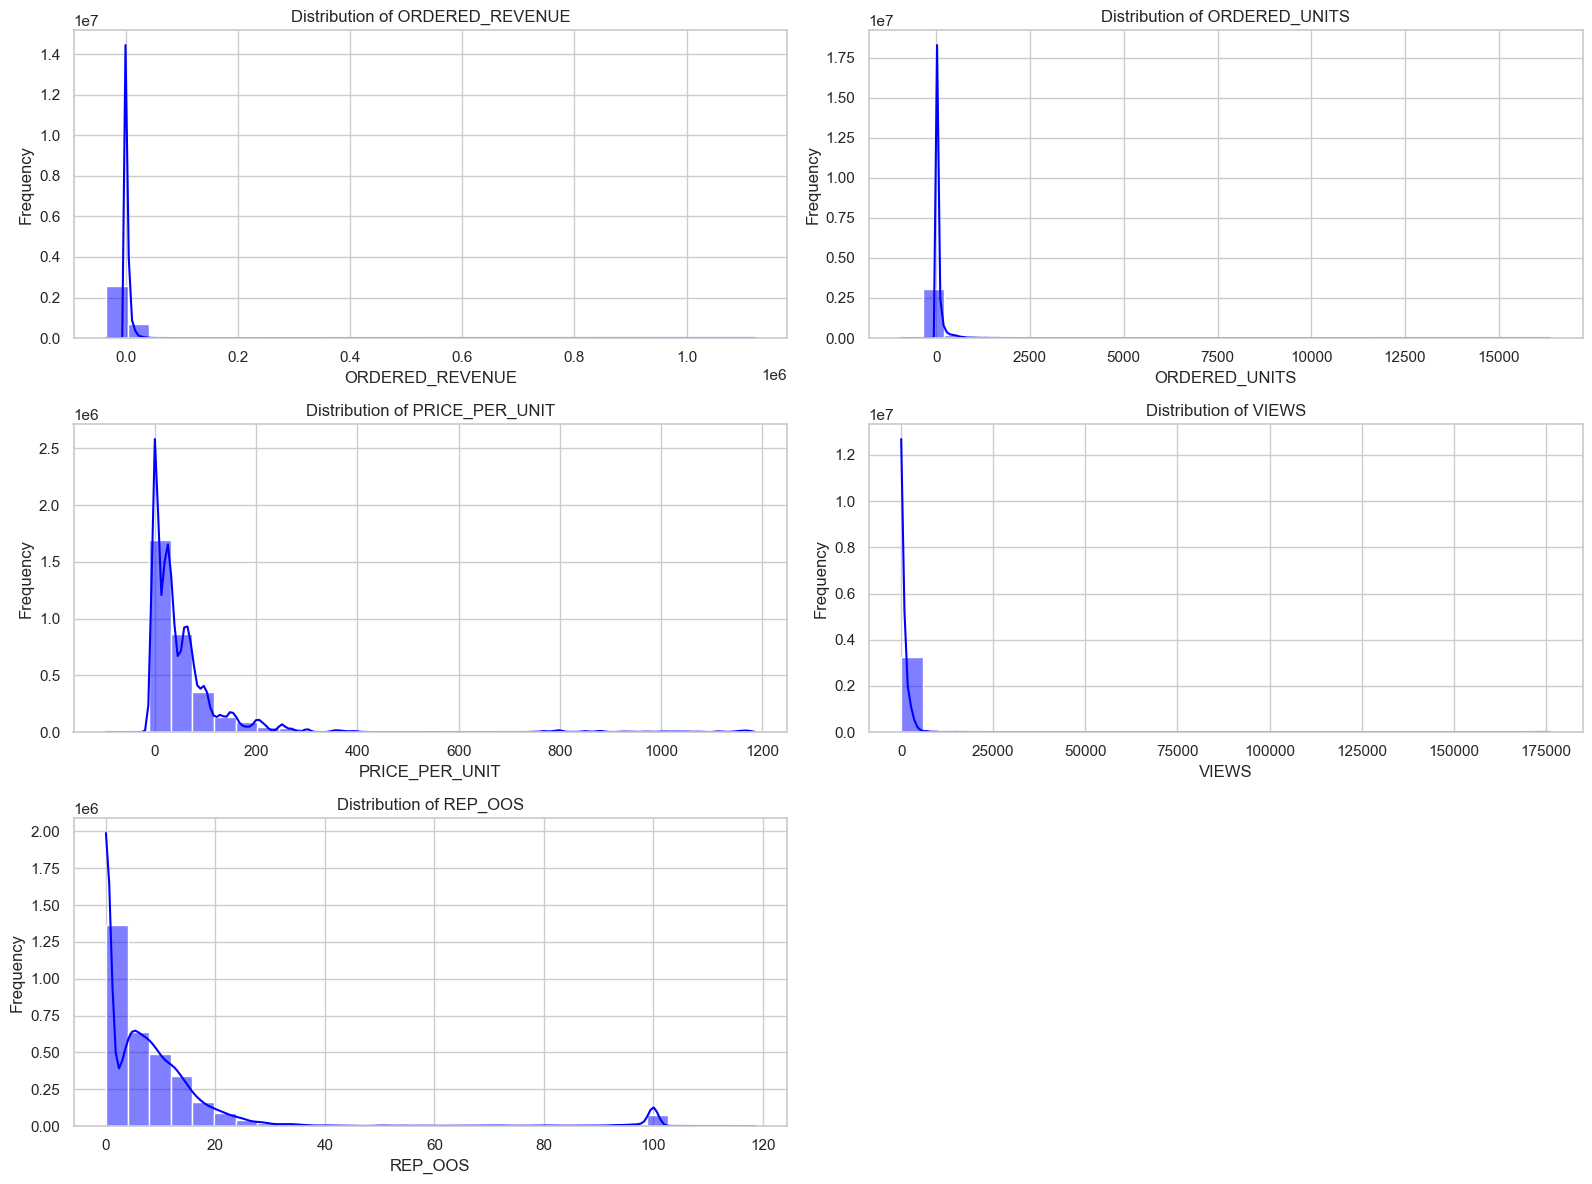

In [ ]:
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Columns for analysis
columns = ['ORDERED_REVENUE', 'ORDERED_UNITS', 'PRICE_PER_UNIT','VIEWS', 'REP_OOS']

# 1. Univariate Analysis
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(merged_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

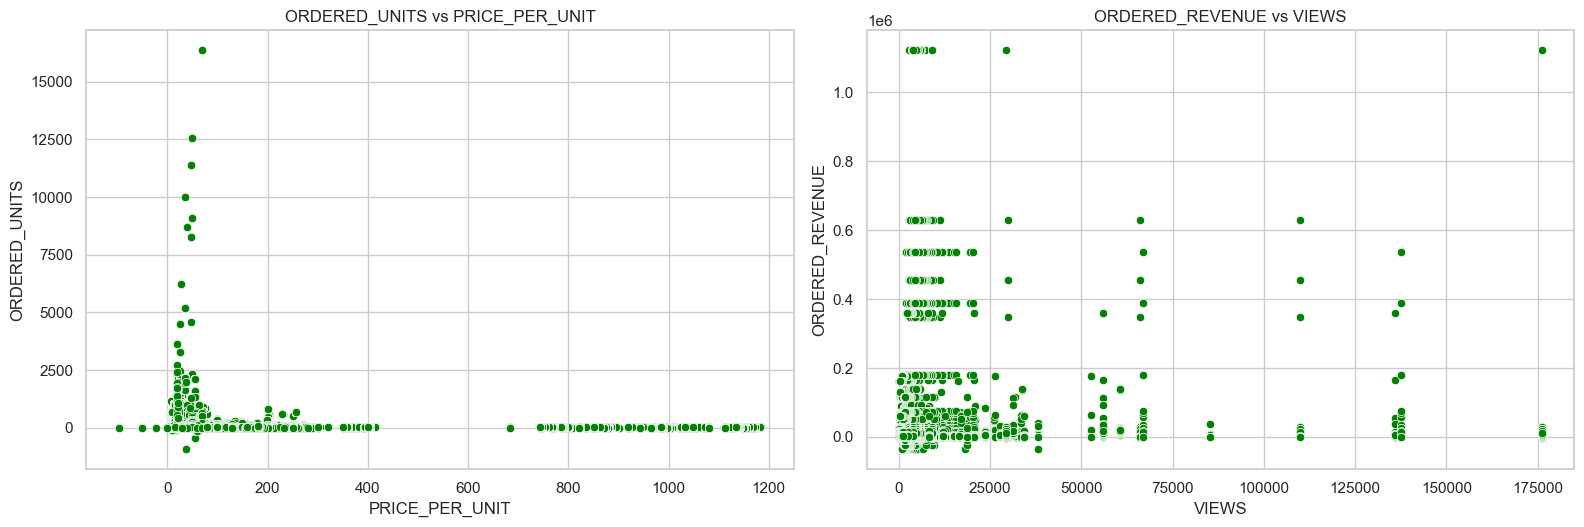

In [ ]:
# 2. Bivariate Analysis: Scatter plots
plt.figure(figsize=(16, 10))
pairs = [('PRICE_PER_UNIT', 'ORDERED_UNITS'), ('VIEWS', 'ORDERED_REVENUE')]
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=merged_df, x=x, y=y, color='green')
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
plt.tight_layout()
plt.show()

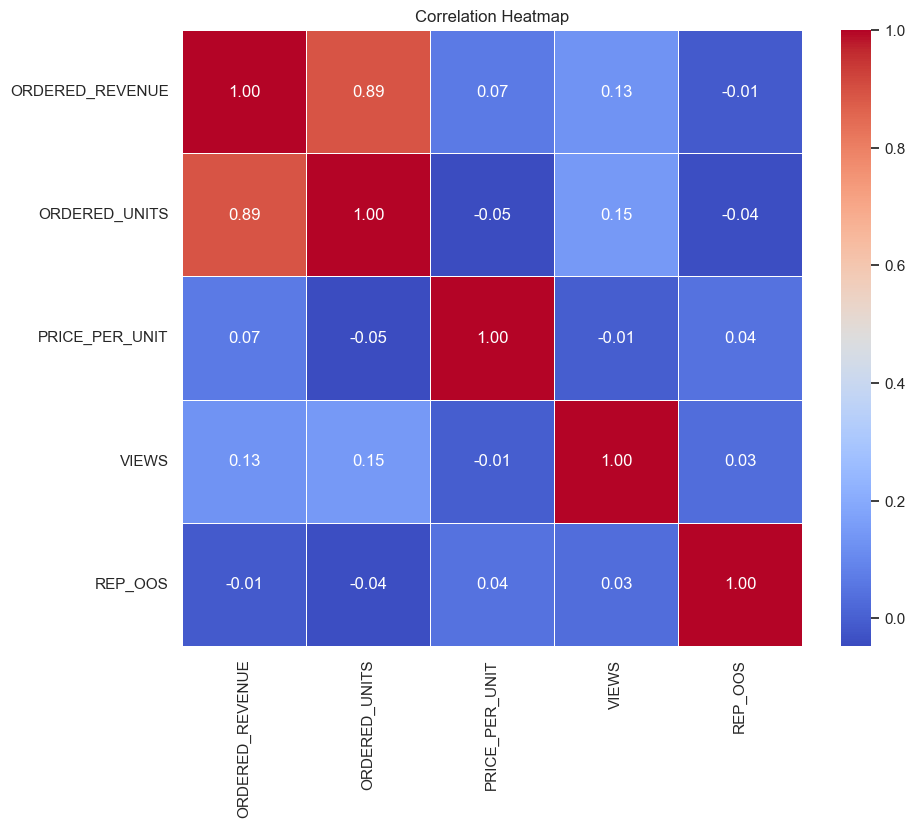

In [ ]:
# 3. Multivariate Analysis: Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

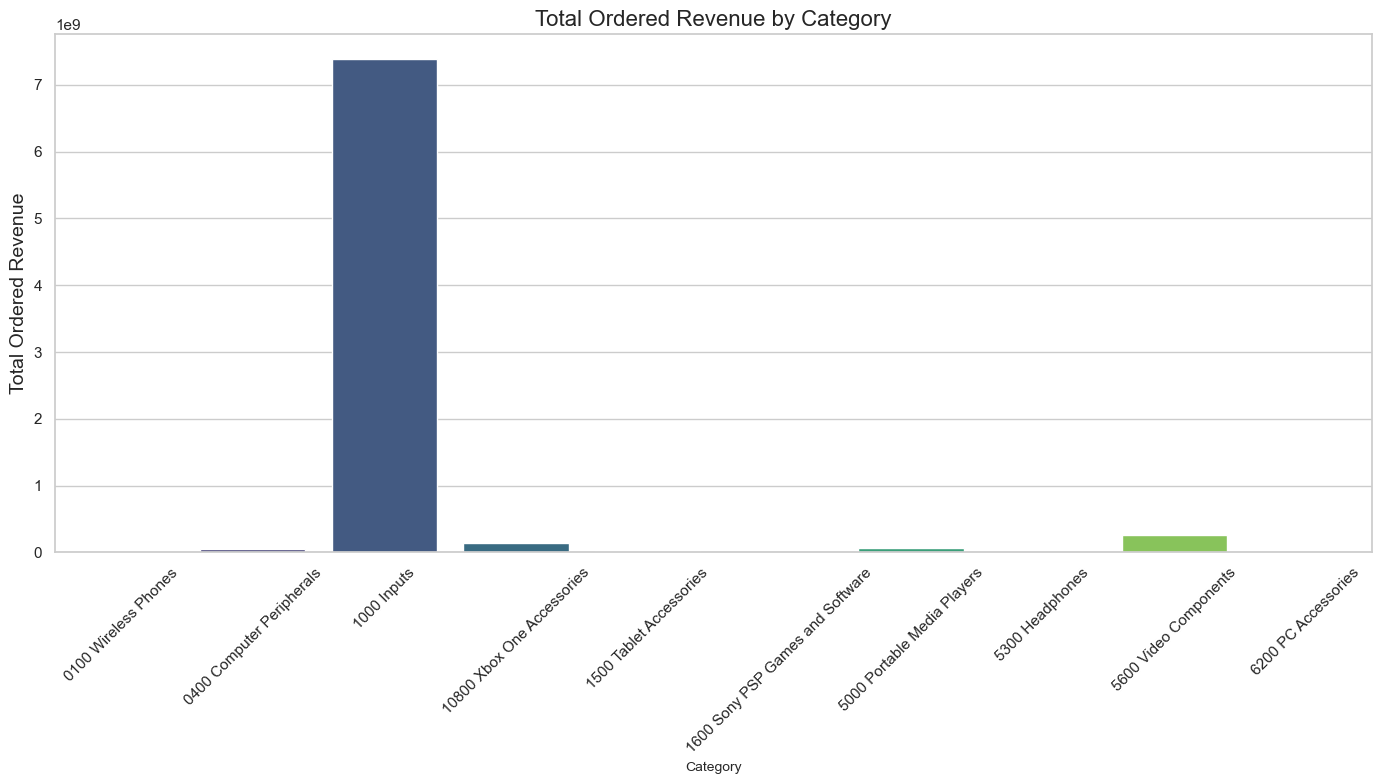

In [ ]:
plt.figure(figsize=(14, 8))

# Bar Plot: Total Ordered Revenue per Category
category_revenue = merged_df.groupby('CATEGORY')['ORDERED_REVENUE'].sum().reset_index()
sns.barplot(data=category_revenue, x='CATEGORY', y='ORDERED_REVENUE', hue='CATEGORY', palette='viridis', legend=False)
plt.title('Total Ordered Revenue by Category', fontsize=16)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Total Ordered Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


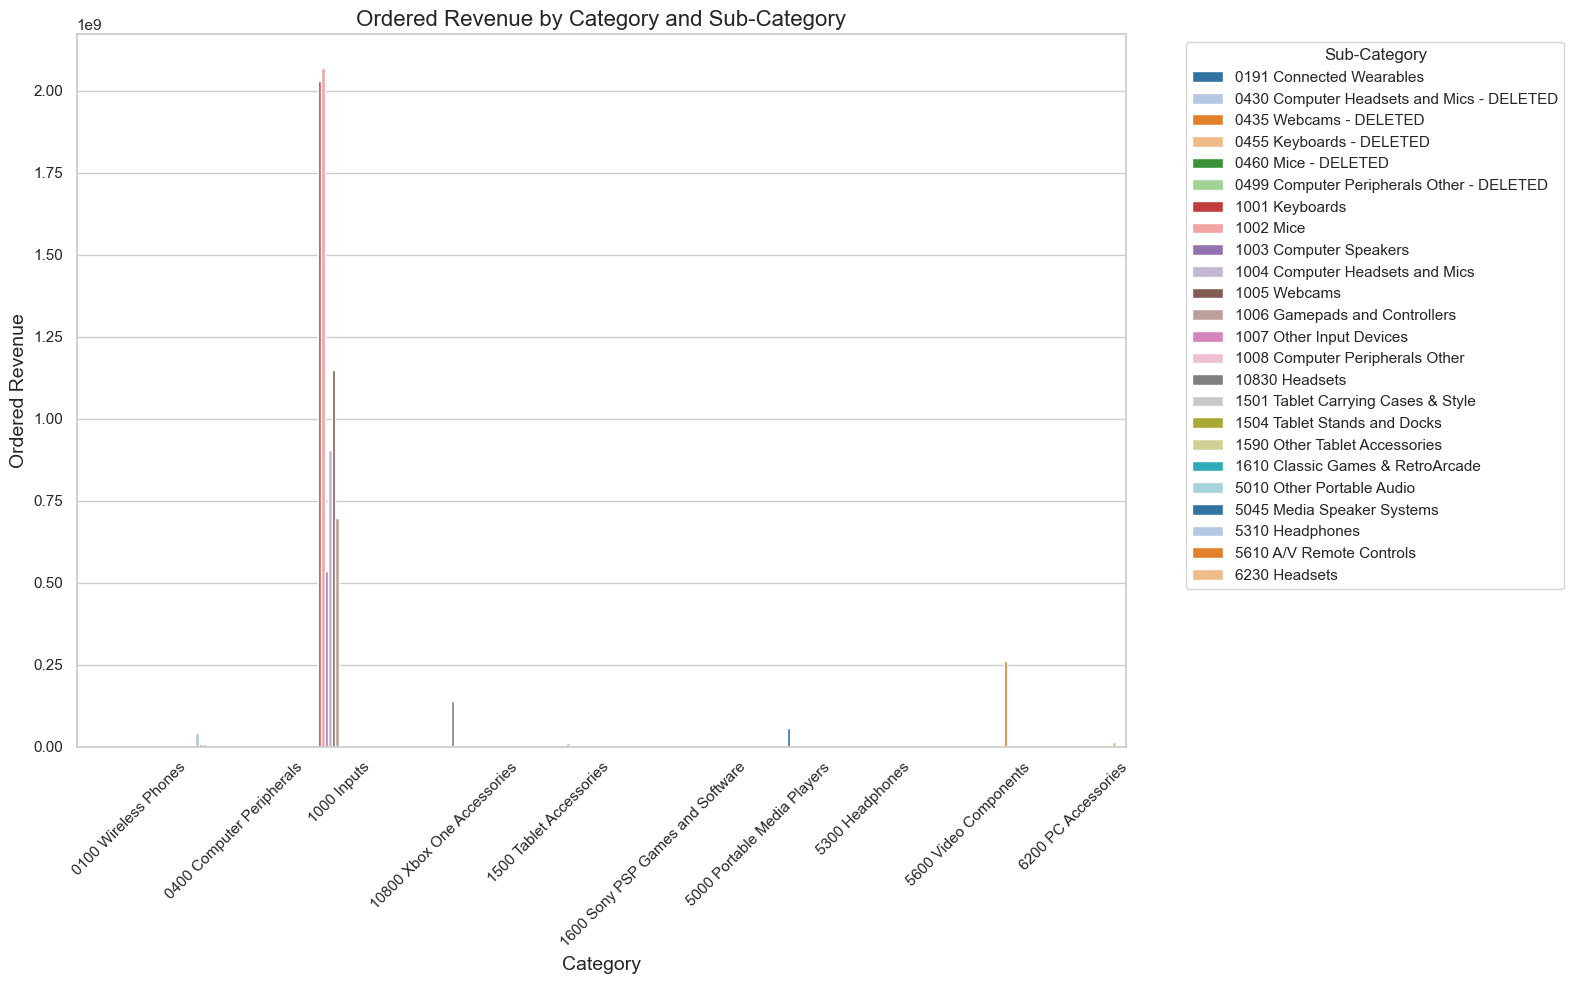

In [ ]:


# Group data by Category and Sub-Category
category_subcategory_revenue = merged_df.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum().reset_index()

# 1. Grouped Bar Plot
plt.figure(figsize=(16, 10))
sns.barplot(
    data=category_subcategory_revenue,
    x='CATEGORY',
    y='ORDERED_REVENUE',
    hue='SUB_CATEGORY',
    palette='tab20'
)
plt.title('Ordered Revenue by Category and Sub-Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Ordered Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





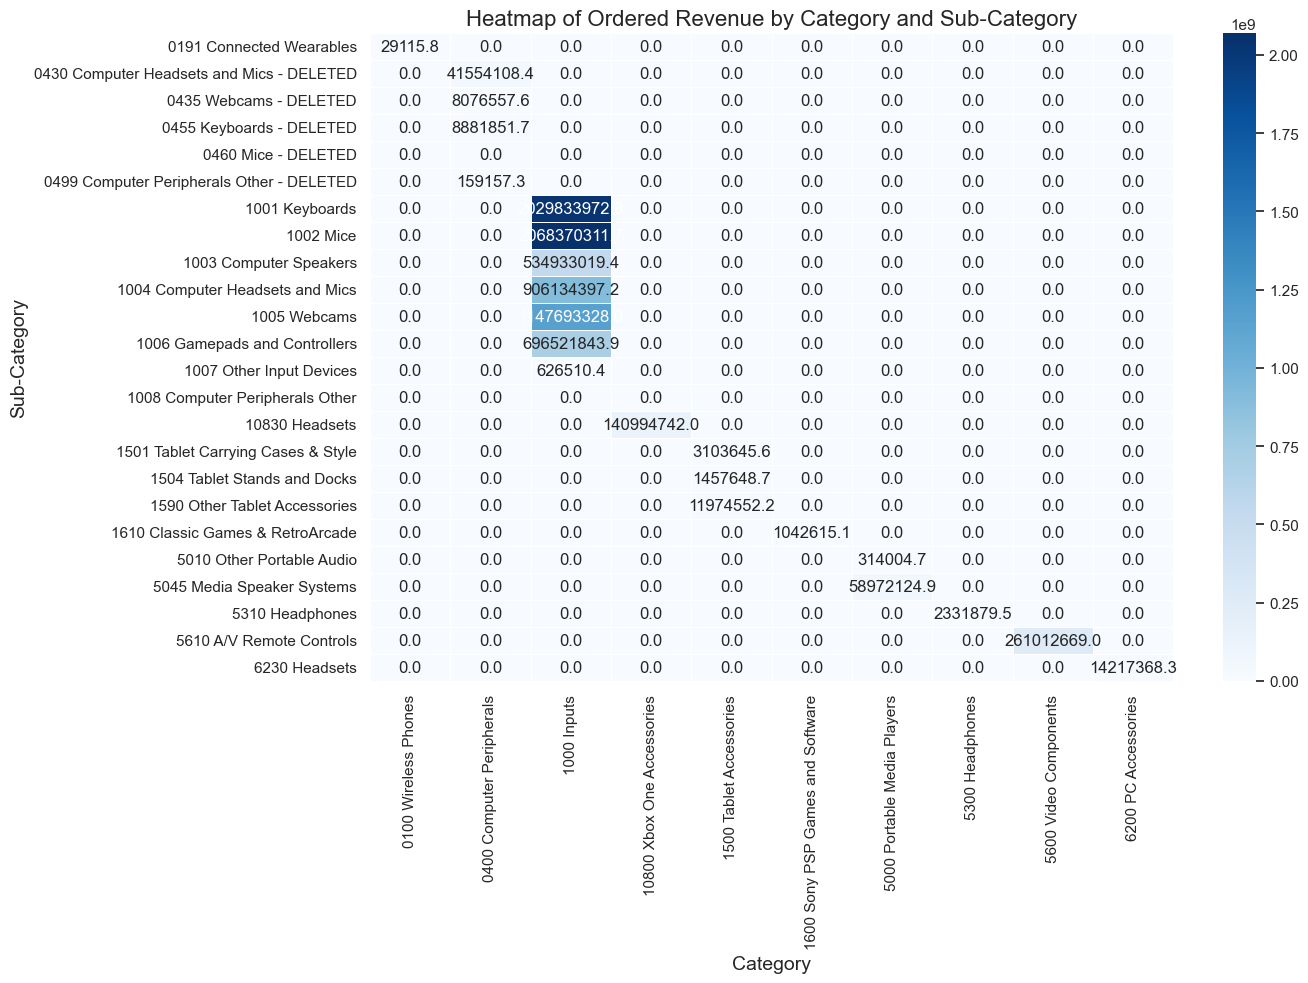

In [ ]:
# 2. Heatmap
pivot_table = category_subcategory_revenue.pivot(index='SUB_CATEGORY', columns='CATEGORY', values='ORDERED_REVENUE').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Ordered Revenue by Category and Sub-Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Sub-Category', fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd

# Assuming df is your DataFrame with columns 'REP_OOS' and 'SKU_NAME'

# Filter the data where REP_OOS > 0
df_rep_oos_gt_0 = merged_df[merged_df['REP_OOS'] > 0]

# Find which SKU_NAME has the highest count of REP_OOS > 0
sku_highest_oos_gt_0 = df_rep_oos_gt_0['SKU_NAME'].value_counts().idxmax()

# Now, for REP_OOS == 0, filter the data
df_rep_oos_0 = merged_df[merged_df['REP_OOS'] == 0]

# Find which SKU_NAME has the least REP_OOS == 0
sku_least_oos_0 = df_rep_oos_0['SKU_NAME'].value_counts().idxmin()

# To count REP_OOS > 0 for each SKU_NAME
rep_oos_count_gt_0 = df_rep_oos_gt_0.groupby('SKU_NAME').size()

# To count REP_OOS == 0 for each SKU_NAME
rep_oos_count_0 = df_rep_oos_0.groupby('SKU_NAME').size()

# Display results
print("SKU_NAME with the highest REP_OOS > 0:", sku_highest_oos_gt_0)
print("SKU_NAME with the least REP_OOS == 0:", sku_least_oos_0)

# To display the counts for REP_OOS > 0 and REP_OOS == 0 for each SKU_NAME
print("\nREP_OOS > 0 counts per SKU_NAME:")
print(rep_oos_count_gt_0)

print("\nREP_OOS == 0 counts per SKU_NAME:")
print(rep_oos_count_0)


SKU_NAME with the highest REP_OOS > 0: B1212PZV
SKU_NAME with the least REP_OOS == 0: C01JSHF992

REP_OOS > 0 counts per SKU_NAME:
SKU_NAME
B004FMWNKW     2006
B004WQ8HS6    15129
B006KSCQKJ    15129
B007LUCJZW    15129
B00WISOJL6    15006
              ...  
D2897OBJ9       123
D28FIEFW5V      123
D28NTVMU32       55
D28QU2Q7         79
D29CMS5Q6O      123
Length: 220, dtype: int64

REP_OOS == 0 counts per SKU_NAME:
SKU_NAME
B0009IWHS      8100
B003H5XG9      5041
B004FMWNKW    11918
B004RUO1U         4
B00DHPE3Z        11
              ...  
D28NTVMU32       12
D28QU2Q7         39
D28ZI3PXUF    15129
D29OFPIPYD       82
D29S5IMRDI       36
Length: 332, dtype: int64


In [ ]:
# Group by SKU_NAME and sum the ORDERED_UNITS
sku_ordered_units_sum = merged_df.groupby('SKU_NAME')['ORDERED_UNITS'].sum()
# Group by CATEGORY and sum the ORDERED_UNITS
category_ordered_units_sum = merged_df.groupby('CATEGORY')['ORDERED_UNITS'].sum()

# Find the SKU_NAME with the highest ORDERED_UNITS
sku_highest_ordered_units = sku_ordered_units_sum.idxmax()
highest_ordered_units = sku_ordered_units_sum.max()
# Find the CATEGORY with the highest ORDERED_UNITS
category_highest_ordered_units = category_ordered_units_sum.idxmax()

# Display the result
print(f"SKU_NAME with the highest ORDERED_UNITS: {sku_highest_ordered_units}")
print(f"Total ORDERED_UNITS for {sku_highest_ordered_units}: {highest_ordered_units}")
print(f"CATEGORY with the highest ORDERED_UNITS: {category_highest_ordered_units}")

SKU_NAME with the highest ORDERED_UNITS: C02QYV5U3W
Total ORDERED_UNITS for C02QYV5U3W: 13308600.0
CATEGORY with the highest ORDERED_UNITS: 1000 Inputs


# Insights


* Top Performing SKU: C02QYV5U3W had the highest ordered units at 13,308,600, indicating its massive popularity and contribution to total sales volume.
* High Out-of-Stock SKU: B1212PZV faced the most reported stockouts, suggesting potential inventory challenges and lost revenue opportunities.
* Efficiently Managed SKU: C01JSHF992 reported zero out-of-stock issues, showcasing excellent inventory control.
* Highest Revenue Category: The 1000 Inputs category led in both ORDERED_REVENUE and ORDERED_UNITS, underscoring its dominance across multiple metrics.
* Sales Event Impact: Revenue spikes on July 15–16, 2019, likely indicate a sale event  followed by a significant dip, pointing to sales cannibalization.
* Revenue-Generating SKUs: About 78.71% of SKUs generated revenue, with 465 SKUs ceasing sales after July, highlighting seasonality or inventory issues.
* Most Expensive SKU: C03CBL721 was the highest-priced SKU at $973.93, targeting a premium market segment.
* Underperforming Sub-Categories: Certain sub-categories lagged in revenue relative to their categories, indicating areas for improvement.
* SKU View Efficiency: The unit conversion rate for specific SKUs (e.g., C120[H:8NV) showed no strong correlation with price, emphasizing other influencing factors like marketing.
* Data Anomalies: Variations in reported REP_OOS suggest inconsistent reporting or operational inefficiencies, necessitating further investigation.

# Recommendations

* Improve Inventory Management: Address high REP_OOS for SKUs like B1212PZV by refining demand forecasting and supply chain efficiency to minimize stockouts.
* Capitalize on Top Performers: Ensure consistent availability of high-demand SKUs like C02QYV5U3W and explore bundling or cross-promotional strategies to maximize their potential.
* Optimize Sale Events: Plan targeted post-sale campaigns to mitigate revenue drops and sustain momentum after major events like sales Day.
* Revive Stagnant SKUs: Investigate SKUs that stopped selling after July and reassess their marketing, pricing, or inventory strategies.
* Focus on Lagging Sub-Categories: Allocate resources to underperforming sub-categories, identifying growth opportunities or re-evaluating their portfolio fit.
* Analyze Price vs. Conversion: Examine factors beyond price influencing conversion rates, such as marketing, placement, or customer reviews, to improve overall efficiency.

# Marketing_Campaign  dataset Analyse

In [ ]:
marketing_campaign_df = pd.read_csv("Downloads/Astro_Guruji/Marketing_Campaign.csv")

In [ ]:
# Function to perform basic EDA
def eda_summary(df, dataset_name):
    print(f"Dataset: {dataset_name}")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nColumns and Data Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nUnique Values per Column:")
    print(df.nunique())
    print("\nSample Data:")
    print(df.head())
    print("-" * 50)
    print("\n")

eda_summary(marketing_campaign_df, "Marketing Campaign")

Dataset: Marketing Campaign
--------------------------------------------------
Shape: (2240, 29)

Columns and Data Types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                  object
Kidhome                 object
Teenhome                object
Dt_Customer             object
Recency                 object
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response  

In [ ]:
# Convert Dt_Customer to a consistent datetime format
marketing_campaign_df['Dt_Customer'] = pd.to_datetime(marketing_campaign_df['Dt_Customer'], errors='coerce')

In [ ]:
# Convert 'Income' column to numeric, handling errors
marketing_campaign_df['Income'] = pd.to_numeric(marketing_campaign_df['Income'], errors='coerce')

# Replace non-numeric values with NaN
marketing_campaign_df['Income'] = marketing_campaign_df['Income'].fillna(marketing_campaign_df['Income'].mean())


<Axes: ylabel='Income'>

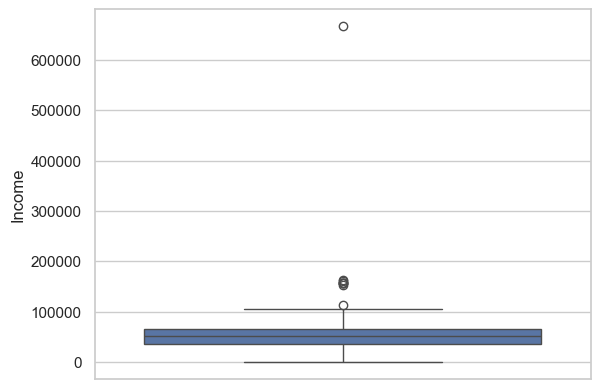

In [ ]:
# Handling Outliers
sns.boxplot(marketing_campaign_df['Income'])

In [ ]:
# Remove or Cap Outliers: use   IQR
Q1 = marketing_campaign_df['Income'].quantile(0.25)
Q3 = marketing_campaign_df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
marketing_campaign_df['Income'] = marketing_campaign_df['Income'].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
# Categorical Fields: Convert categorical fields to consistent types.
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    marketing_campaign_df[col] = marketing_campaign_df[col].astype('category')

In [ ]:
# Total Spending: Sum up all monetary columns (MntWines, MntFruits, etc.) to create a total spending feature.
marketing_campaign_df['Total_Spending'] = marketing_campaign_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                            'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [ ]:
# Spending on Specific Categories: Calculate proportions of spending in different categories.
marketing_campaign_df['Wines_Spending_Ratio'] = marketing_campaign_df['MntWines'] / marketing_campaign_df['Total_Spending']
marketing_campaign_df['Meat_Spending_Ratio'] = marketing_campaign_df['MntMeatProducts'] / marketing_campaign_df['Total_Spending']

In [ ]:
# Number of Purchases: Sum up the purchase columns (NumDealsPurchases, NumWebPurchases, etc.).
marketing_campaign_df['Total_Purchases'] = marketing_campaign_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                             'NumStorePurchases']].sum(axis=1)


Segmenting Customers

In [ ]:
# Spending Segments: Classify customers based on total spending.
bins = [0, 500, 2000, 5000, 10000]
labels = ['Low Spender', 'Moderate Spender', 'High Spender', 'Very High Spender']
marketing_campaign_df['Spending_Segment'] = pd.cut(marketing_campaign_df['Total_Spending'], bins=bins, labels=labels)

In [ ]:
# Purchase Frequency Segments: Categorize customers based on the number of purchases.
bins = [0, 10, 20, 50, 100]
labels = ['Occasional', 'Regular', 'Frequent', 'Very Frequent']
marketing_campaign_df['Purchase_Frequency_Segment'] = pd.cut(marketing_campaign_df['Total_Purchases'], bins=bins, labels=labels)

In [ ]:
# Family Size: Combine Kidhome and Teenhome to derive total family size
marketing_campaign_df['Family_Size'] = marketing_campaign_df['Kidhome'] + marketing_campaign_df['Teenhome']


In [ ]:
# Customer Lifecycle Stage: Use Year_Birth to estimate age and segment customers into lifecycle stages
marketing_campaign_df['Age'] = pd.Timestamp.now().year - marketing_campaign_df['Year_Birth']
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
marketing_campaign_df['Lifecycle_Stage'] = pd.cut(marketing_campaign_df['Age'], bins=bins, labels=labels)

Aggregating Variables

In [ ]:
# Campaign Success Rate: Calculate the percentage of campaigns a customer accepted.
marketing_campaign_df['Campaign_Success_Rate'] = marketing_campaign_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                   'AcceptedCmp4', 'AcceptedCmp5']].mean(axis=1)


In [ ]:
# Convert 'Recency' column to numeric, coercing errors to NaN
marketing_campaign_df['Recency'] = pd.to_numeric(marketing_campaign_df['Recency'], errors='coerce')

# Calculate Engagement_Score
marketing_campaign_df['Engagement_Score'] = (marketing_campaign_df['Total_Purchases'] / marketing_campaign_df['Recency']) * marketing_campaign_df['Campaign_Success_Rate']

In [ ]:
# Complaints Impact: Highlight customers who complained despite spending a lot.
marketing_campaign_df['High_Spending_Complaint'] = (marketing_campaign_df['Total_Spending'] > 2000) & (marketing_campaign_df['Complain'] == 1)


In [ ]:
# Preferred Purchase Channel: Identify the channel where a customer purchases the most.
marketing_campaign_df['Preferred_Channel'] = marketing_campaign_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)


In [ ]:
# Calculate Days Registered
marketing_campaign_df['Days_Registered'] = (pd.Timestamp.now() - marketing_campaign_df['Dt_Customer']).dt.days

# Sort the entire DataFrame by 'Dt_Customer'
marketing_campaign_df.sort_values(by=['Dt_Customer'], ascending=True, inplace=True) # Sort the entire DataFrame

# Preview the result
marketing_campaign_df[['Dt_Customer', 'Days_Registered']].head()

,Dt_Customer,Days_Registered
1346,1900-01-01,45612.0
1077,1900-01-01,45612.0
1658,1900-01-01,45612.0
453,1900-01-01,45612.0
1067,1900-01-01,45612.0


In [ ]:
# Identify the Last Recorded Date:
last_recorded_date = marketing_campaign_df['Dt_Customer'].max()

In [ ]:
# Calculate the Difference in Days
marketing_campaign_df['Dt_Customer'] = pd.to_datetime(marketing_campaign_df['Dt_Customer'], errors='coerce')
last_recorded_date = pd.to_datetime(last_recorded_date, errors='coerce')

# Calculate the Difference in Days
marketing_campaign_df['Days_Registered'] = (last_recorded_date - marketing_campaign_df['Dt_Customer']).dt.days

In [ ]:
marketing_campaign_df[['Dt_Customer', 'Days_Registered']].head()

,Dt_Customer,Days_Registered
1346,1900-01-01,41977.0
1077,1900-01-01,41977.0
1658,1900-01-01,41977.0
453,1900-01-01,41977.0
1067,1900-01-01,41977.0


In [ ]:
# Identify the last recorded date (most recent date in the dataset)
last_recorded_date = marketing_campaign_df['Dt_Customer'].max()

# Calculate the first recorded date for each customer (earliest Dt_Customer)
marketing_campaign_df['Customer_For'] = (last_recorded_date - marketing_campaign_df['Dt_Customer']).dt.days

# Preview the result
marketing_campaign_df[['ID', 'Dt_Customer', 'Customer_For']].head()


,ID,Dt_Customer,Customer_For
1346,10390,1900-01-01,41977.0
1077,577,1900-01-01,41977.0
1658,1378,1900-01-01,41977.0
453,6131,1900-01-01,41977.0
1067,2223,1900-01-01,41977.0


In [ ]:
# Customer_For" with Engagement Metrics


# You can combine "Customer_For" with other features like total purchases and spending for deeper insights
marketing_campaign_df['Total_Spending'] = marketing_campaign_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                            'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create a Customer Engagement Score
# Example: A basic scoring system (adjust as needed)
marketing_campaign_df['Engagement_Score'] = (marketing_campaign_df['Customer_For'] * 0.5) + (marketing_campaign_df['Total_Spending'] * 0.3) + (marketing_campaign_df['Total_Purchases'] * 0.2)

# You could categorize customers based on their "Customer_For" and "Engagement_Score"
conditions = [
    (marketing_campaign_df['Customer_For'] > 3650) & (marketing_campaign_df['Engagement_Score'] > 1000),  # Loyal and Highly Engaged
    (marketing_campaign_df['Customer_For'] > 3650) & (marketing_campaign_df['Engagement_Score'] <= 1000),  # Loyal but Low Engagement
    (marketing_campaign_df['Customer_For'] <= 3650) & (marketing_campaign_df['Engagement_Score'] > 1000),  # New but Highly Engaged
    (marketing_campaign_df['Customer_For'] <= 3650) & (marketing_campaign_df['Engagement_Score'] <= 1000)  # New and Low Engagement
]

choices = ['Loyal and Highly Engaged', 'Loyal but Low Engagement', 'New but Highly Engaged', 'New and Low Engagement']

marketing_campaign_df['Customer_Engagement'] = pd.cut(marketing_campaign_df['Engagement_Score'], bins=[-float('inf'), 1000, 2000, 3000, float('inf')], labels=choices)

# Preview the result
marketing_campaign_df[['ID', 'Dt_Customer', 'Customer_For', 'Total_Spending', 'Engagement_Score', 'Customer_Engagement']].head()


,ID,Dt_Customer,Customer_For,Total_Spending,Engagement_Score,Customer_Engagement
1346,10390,1900-01-01,41977.0,51,21005.4,New and Low Engagement
1077,577,1900-01-01,41977.0,30,20998.5,New and Low Engagement
1658,1378,1900-01-01,41977.0,584,21193.9,New and Low Engagement
453,6131,1900-01-01,41977.0,495,21143.2,New and Low Engagement
1067,2223,1900-01-01,41977.0,1729,21542.0,New and Low Engagement


C:\Users\ukprath\AppData\Local\Temp\ipykernel_8788\614575251.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marketing_campaign_df, x='Education', ax=axes[1, 0], palette='Set2')
C:\Users\ukprath\AppData\Local\Temp\ipykernel_8788\614575251.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marketing_campaign_df, x='Marital_Status', ax=axes[1, 1], palette='Set1')


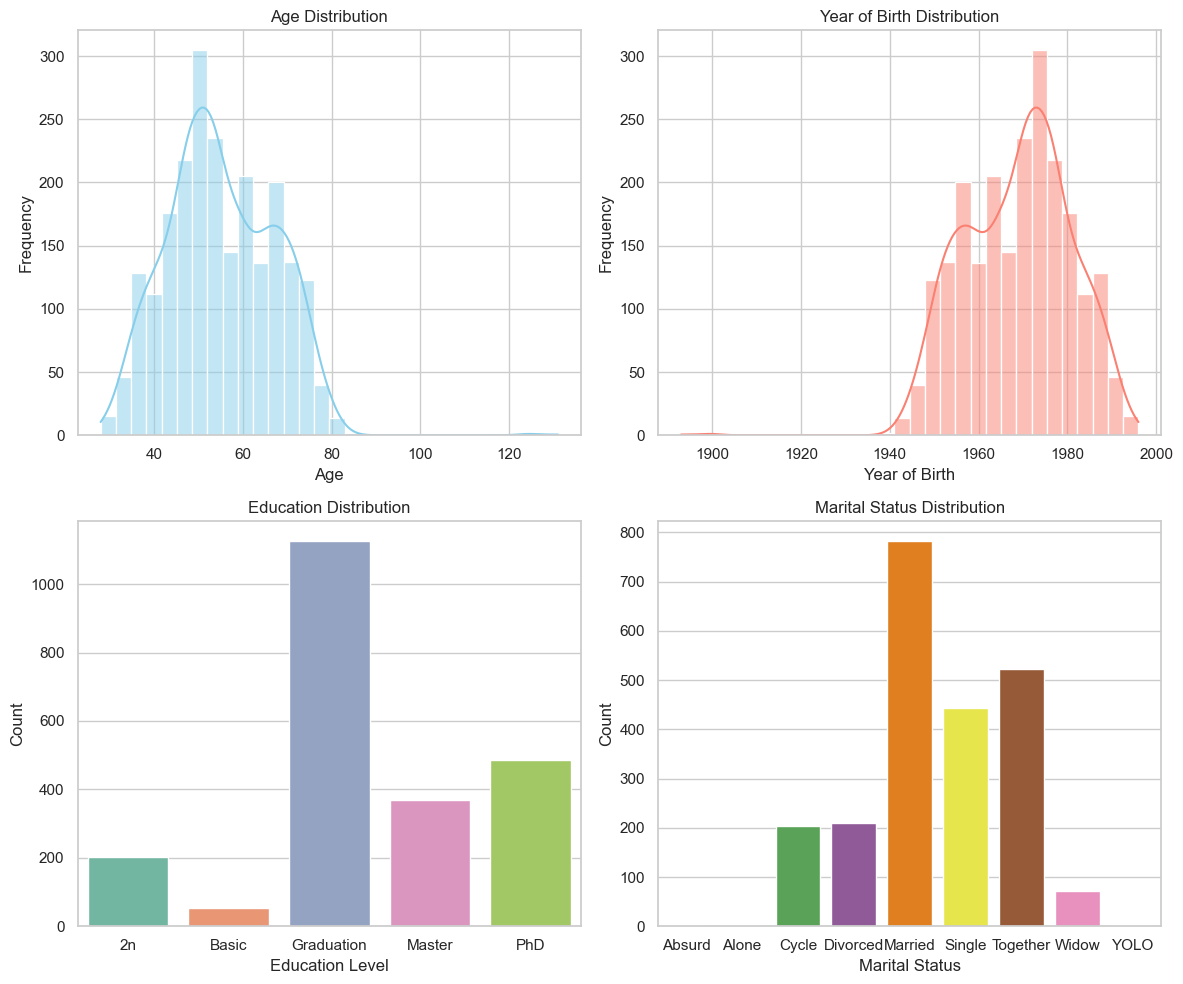

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming marketing_campaign_df is already loaded

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Age distribution
sns.histplot(marketing_campaign_df['Age'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot Year_Birth distribution
sns.histplot(marketing_campaign_df['Year_Birth'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Year of Birth Distribution')
axes[0, 1].set_xlabel('Year of Birth')
axes[0, 1].set_ylabel('Frequency')

# Plot Education distribution (categorical data)
sns.countplot(data=marketing_campaign_df, x='Education', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Education Distribution')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Count')

# Plot Marital_Status distribution (categorical data)
sns.countplot(data=marketing_campaign_df, x='Marital_Status', ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Marital Status Distribution')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



* The dataset shows that the most frequent age of customers is 48 years old.
* The most common year of birth for the customers is 1976, indicating a group of customers born around the same time.
* A majority of the customers in the dataset are married, which could inform targeted marketing strategies based on relationship status.
* The most common education level is Graduation, which suggests that most customers have completed higher education.

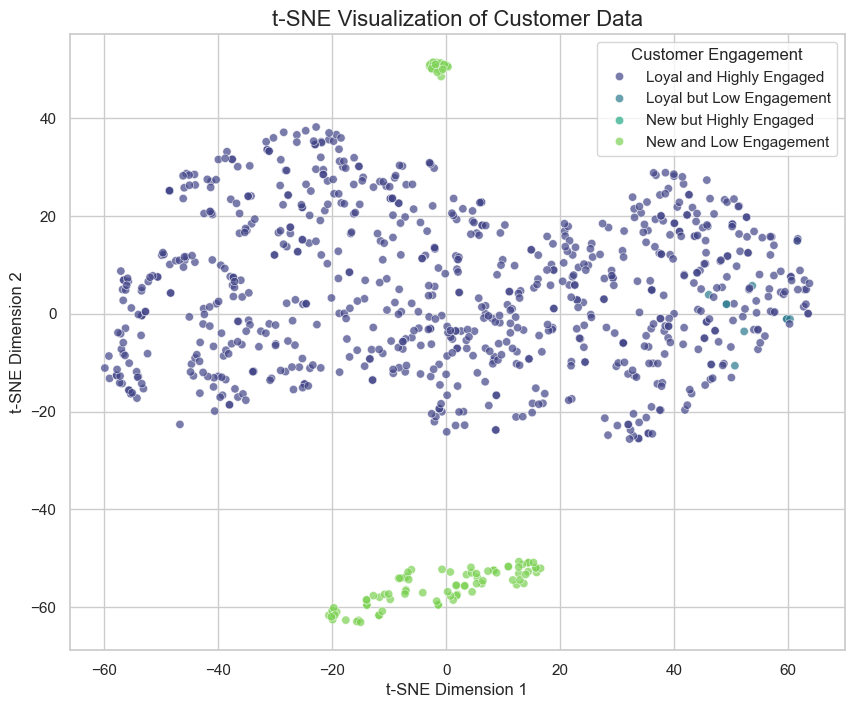

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset 'df' is already cleaned and pre-processed

# Select numeric columns for t-SNE (you may exclude categorical variables)
numeric_columns = ['Income', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'Total_Spending']

# Handle missing values (replace with median for example)
# You can choose other imputation strategies like mean, or a more sophisticated method
for column in numeric_columns:
    marketing_campaign_df[column] = marketing_campaign_df[column].fillna(marketing_campaign_df[column].median())

# Normalize the data (standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(marketing_campaign_df[numeric_columns])

# Apply t-SNE (use a 2D space for easier visualization)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Add the t-SNE results back to the dataframe
marketing_campaign_df['tsne_1'] = tsne_results[:, 0]
marketing_campaign_df['tsne_2'] = tsne_results[:, 1]

# Visualize the t-SNE results in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', data=marketing_campaign_df, hue='Customer_Engagement', palette='viridis', alpha=0.7) # Change df to marketing_campaign_df
plt.title('t-SNE Visualization of Customer Data', fontsize=16)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Customer Engagement', loc='upper right')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # Use the same number of components as t-SNE for comparison
pca_results = pca.fit_transform(scaled_data)

# Now you can access explained variance:
pca.explained_variance_ratio_

array([0.36023099, 0.21370945])

* By using these two principal components, you retain about 57.39% of the dataset's variability, while reducing the number of dimensions (features).

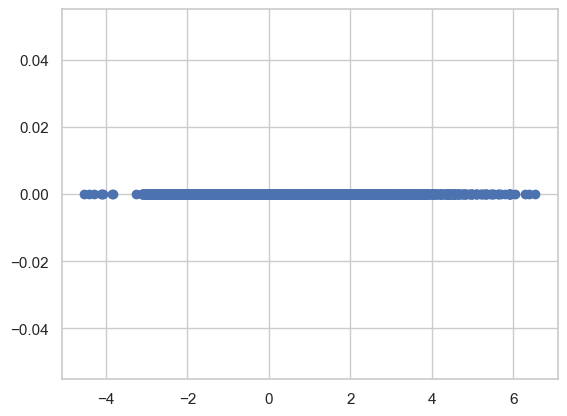

In [ ]:
plt.figure()
plt.scatter(pca_results[:, 0], np.zeros((len(marketing_campaign_df),)))
plt.show()

# Insights
* Age Distribution: The most common age is 48, suggesting a middle-aged customer base, which might impact product preferences and marketing strategies.

* Year of Birth: Most customers were born in 1976, indicating a strong presence of customers in their late 40s, potentially with stable purchasing power and family needs.

* Marital Status: The majority of customers are married, which could indicate a family-oriented target group, ideal for promoting family-based products or services.

* Education Level: A significant portion of customers have completed their graduation, suggesting an educated audience with the potential for higher-value products and services.

* Income Range: The income distribution shows a varied income range, which indicates opportunities to segment marketing campaigns by income brackets to target both high and low-income groups.

* Customer Loyalty: The 'Days Registered' and 'Customer_For' features indicate long-standing customers, with a considerable portion being loyal, offering opportunities for retention-focused campaigns.

* Spending Habits: Customers show significant spending on products like wine, meat, and sweets, which can inform promotions on high-value or specialty items.

* Campaign Engagement: Analysis of campaign acceptance indicates a strong response to specific marketing campaigns, highlighting the effectiveness of targeted promotions.

* Purchase Behavior: Customers make frequent web purchases, showcasing a preference for online shopping, which can guide future digital marketing efforts and website improvements.

* Customer Segmentation: Based on features like family size, spending habits, and engagement, customers can be segmented into distinct groups for more personalized and effective marketing strategies.

# Recommendations


* Target Family-Oriented Products: Focus marketing efforts on family-based products, considering the high proportion of married customers with children.
  
* Promote Premium Offerings: Leverage the higher education level of customers by promoting premium or advanced products and services.
  
* Loyalty Programs: Implement loyalty programs for long-term customers, encouraging retention and increased lifetime value.
  
* Tailored Campaigns: Create personalized campaigns based on age .
  
* Enhance Digital Experience: Given the high frequency of online purchases, invest in improving the online shopping experience and digital marketing.
  
* Segment by Income: Customize offers for different income brackets to better address the diverse financial capacity of the customer base.